In [2]:
import os
import torch
import torch.nn as nn
import numpy as np
import time
import random
import math
import copy
from matplotlib import pyplot as plt


0.22162241832135404
coeff: [ 1.00366922e-07 -1.03313343e-05 -6.47148305e-04  2.89574218e-01]


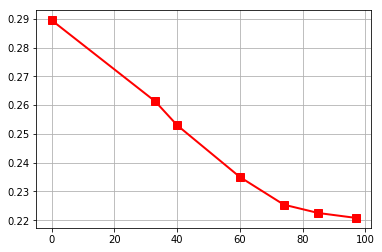

In [250]:
sparsity = [0, 33, 40, 60, 74, 85, 97]
# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.2295] # origin
power = [0.2895, 0.2613, 0.2530, 0.2350, 0.2254, 0.2225, 0.2208]
color = (255/255, 0, 0)
plt.plot(sparsity, power, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

plt.grid(True)

coeff = polyfit(sparsity, power, 3)
f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'x-', marker='^',  linewidth=2, markersize=8)
from numpy import random
print(f((96*97)**0.5)+random.normal(0.0005, 0.001))
print("coeff: {}".format(coeff))
plt.show()



0.0903766666666667


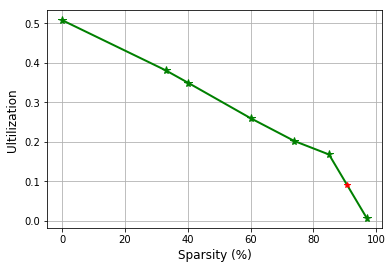

In [448]:
ultilization = [0.508, 0.381, 0.35, 0.26, 0.202, 0.168, 0.0074]
plt.plot(sparsity, ultilization, 'x-', marker='*', color='green',  linewidth=2, markersize=8, label='energy efficiency')
fetch_sparsity = 100- 9.2
fetch_energy = np.interp(fetch_sparsity, sparsity, ultilization)
print(fetch_energy)
plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('Sparsity (%)', size=12)
plt.ylabel('Ultilization ', size=12)
plt.grid(True)
plt.show()

In [254]:
# -*- coding: utf-8 -*- 
import  xdrlib ,sys
import xlrd
def open_excel(file= '../source/paper_JSSC.xls'):
    try:
        data = xlrd.open_workbook(file)
        return data
    except: # Exception,e:
        print("read error ")
        
def excel_table_byindex(file= 'file.xls',colnameindex=0,by_index=0, nrows = 1):
    data = open_excel(file)
    table = data.sheets()[by_index]
#     nrows = table.nrows #ÐÐÊý
    ncols = table.ncols #ÁÐÊý
    colnames =  table.row_values(colnameindex) #Ä³Ò»ÐÐÊý¾Ý 
    list =[]
    for rownum in range(1,nrows):

         row = table.row_values(rownum)
         if row:
             app = {}
             for i in range(len(colnames)):
                app[colnames[i]] = row[i] 
             list.append(app)
    return list

voltage =[]
frequency =[]
power =[]
tables = excel_table_byindex(file='/workspace/Sagitta_Fig/source/Paper_JSSC.xls',by_index=4, nrows =19)
for row in tables:
   print(row)
   voltage.append(row['Voltage-Frequency Scaling'])
   frequency.append(row['Clock Frequency(MHz)'])
   power.append(row['Power(mW)'])



{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 5.0, 'Power(mW)': 0.009}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 10.0, 'Power(mW)': 0.0163}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 20.0, 'Power(mW)': 0.03}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 30.0, 'Power(mW)': 0.045}
{'Voltage-Frequency Scaling': 0.72, 'Clock Frequency(MHz)': 40.0, 'Power(mW)': 0.06}
{'Voltage-Frequency Scaling': 0.74, 'Clock Frequency(MHz)': 50.0, 'Power(mW)': 0.0788}
{'Voltage-Frequency Scaling': 0.77, 'Clock Frequency(MHz)': 60.0, 'Power(mW)': 0.1011}
{'Voltage-Frequency Scaling': 0.81, 'Clock Frequency(MHz)': 70.0, 'Power(mW)': 0.1294}
{'Voltage-Frequency Scaling': 0.85, 'Clock Frequency(MHz)': 80.0, 'Power(mW)': 0.1616}
{'Voltage-Frequency Scaling': 0.88, 'Clock Frequency(MHz)': 90.0, 'Power(mW)': 0.192}
{'Voltage-Frequency Scaling': 0.9, 'Clock Frequency(MHz)': 100.0, 'Power(mW)': 0.2254}
{'Voltage-Frequency Scaling': 0.95, 'Clock Frequenc

ValueError: x and y must have same first dimension, but have shapes (18,) and (8,)

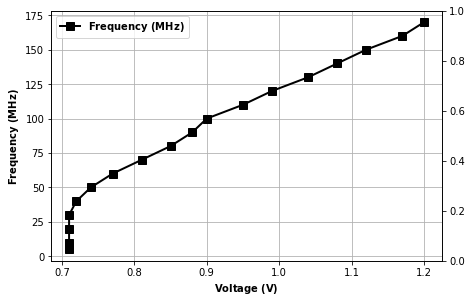

In [274]:

plt_fig({   "x_name":"Voltage", 
            "x_value": voltage, 
            "x_label" : r"$\bf{Voltage}$"+' ' + r"$\bf{(V)}$",
            "y1_fig_type": "plot",
            "y1_name":"Frequency",
            "y1_value":frequency, 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Frequency}$"+' ' + r"$\bf{(MHz)}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Frequency}$",
            "y2_fig_type": "plot",
            "y2_name":"Power",
            "y2_value":power,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Power}$"+' ' + r"$\bf{(W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Power}$",
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.01,
            # "xticks": False,
            "figsize" : (7, 4.6),
            "fig_name" :'../../generate/Voltage-Frequency-Scaling.svg'
})

In [267]:
from mpl_toolkits.mplot3d import axes3d
class MyAxes3D(axes3d.Axes3D):

    def __init__(self, baseObject, sides_to_draw):
        self.__class__ = type(baseObject.__class__.__name__,
                              (self.__class__, baseObject.__class__),
                              {})
        self.__dict__ = baseObject.__dict__
        self.sides_to_draw = list(sides_to_draw)
        self.mouse_init()

    def set_some_features_visibility(self, visible):
        for t in self.w_zaxis.get_ticklines() + self.w_zaxis.get_ticklabels():
            t.set_visible(visible)
        self.w_zaxis.line.set_visible(visible)
        self.w_zaxis.pane.set_visible(visible)
        self.w_zaxis.label.set_visible(visible)

    def draw(self, renderer):
        # set visibility of some features False 
        self.set_some_features_visibility(False)
        # draw the axes
        super(MyAxes3D, self).draw(renderer)
        # set visibility of some features True. 
        # This could be adapted to set your features to desired visibility, 
        # e.g. storing the previous values and restoring the values
        self.set_some_features_visibility(True)

        zaxis = self.zaxis
        draw_grid_old = zaxis.axes._draw_grid
# disable draw grid
        zaxis.axes._draw_grid = False

        tmp_planes = zaxis._PLANES

        if 'l' in self.sides_to_draw :
            # draw zaxis on the left side
            zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                             tmp_planes[0], tmp_planes[1],
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)
        if 'r' in self.sides_to_draw :
            # draw zaxis on the right side
            zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
                             tmp_planes[1], tmp_planes[0], 
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)

        zaxis._PLANES = tmp_planes

        # disable draw grid
        zaxis.axes._draw_grid = draw_grid_old

[0.003 0.007 0.011 0.009 0.007 0.009 0.013 0.026 0.053 0.003 0.007 0.011
 0.009 0.007 0.009 0.013]


NameError: name 'MyAxes3D' is not defined

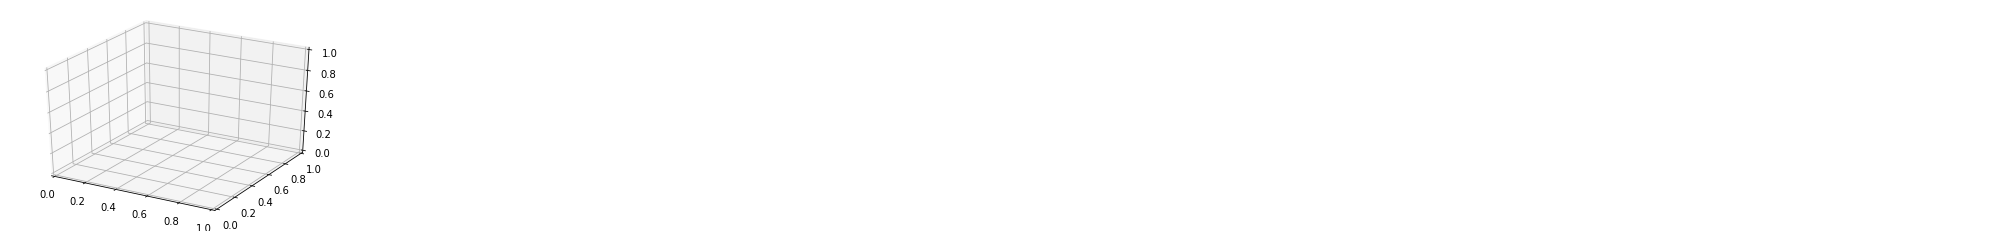

In [39]:
# ÔØÈëÄ£¿é
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
# import seaborn as sns
from scipy import interpolate

#Éú³ÉÊý¾Ý
# x = np.linspace(0.1,0.9,4)
x = np.array([1, 2, 3, 4])
# y = np.linspace(0.1,0.9,4)
y = np.array([88, 89, 96.5, 98])
# z = np.random.rand(16)
accuracy = np.array([0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948, 0.935, 0.908,
0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948     
    ])
# z = np.zeros(16)
# for i in range(16):
#     z[i] = 0.961 - accuracy[i]
z = 0.961 - accuracy
print(z)
#²åÖµ
# xx, yy = np.meshgrid(x, y)

f = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(1,4,5)
ynew = np.linspace(88,98,5)
znew = f(xnew, ynew)

#ÐÞ¸Äx,y£¬zÊäÈë»­Í¼º¯ÊýÇ°µÄshape
xx1, yy1 = np.meshgrid(xnew, ynew)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)

#»­Í¼
# sns.set(style='white')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes(MyAxes3D(ax, 'l'))
ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.savefig('../../generate/threshold-sparsity-accuracy.svg', format='svg')
plt.show()


In [446]:
import numpy as np
from matplotlib import pyplot as plt
class cls_plt_fig():
    def __init__(self, name):
        self.name = name
    def func_plt_fig(self, fig_dict={   "x_name":"Conv Layers", 
            "x_value": np.arange(len(con_layer)), 
            "x_label" : r"$\bf{Conv}$"+' ' +r"$\bf{Layers}$",
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":speedup, 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Speedup}$",
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":energy_efficiency,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$",
            "y2_yticks_max": 12,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.4,
            "xticks": con_layer,
            "plt_text": True,
            "legend_loc": (0.65, 0.8),
            "fig_name" :'../../generate/speedup&EE_layer.svg'
            }): # dict
        fig, ax = plt.subplots(figsize=fig_dict["figsize"] if "figsize" in fig_dict else (7, 4.6))
        color = fig_dict["y1_color"]
        family = fig_dict["family"]
        label_size = fig_dict["label_size"]
        if fig_dict['y1_fig_type'] == 'plot':
            ax.plot(fig_dict["x_value"], fig_dict["y1_value"], fig_dict["y1_linestyle"], marker=fig_dict["y1_marker"], color=color,  linewidth=fig_dict["linewidth"], markersize=fig_dict["markersize"], label=fig_dict["y1_legend"])
        elif fig_dict['y1_fig_type'] == 'bar':
            ax.bar(fig_dict["x_value"] - fig_dict['bar_width']/2, fig_dict["y1_value"],color=color, width=fig_dict['bar_width'], linewidth=fig_dict["linewidth"],label=fig_dict["y1_legend"])
        else:
            print("Key Error 'fig_type'")
            os.exit()

        ax.set_xlabel(fig_dict["x_label"], size=label_size, family=family)
        ax.set_ylabel(fig_dict["y1_label"], size=label_size, color=color, family=family)
        
        from matplotlib.pyplot import MultipleLocator
        inst = plt.gca()
        handles1, labels1 = ax.get_legend_handles_labels()
        if "y2_name" in fig_dict:
            ax1 = ax.twinx()
            color1 = fig_dict["y2_color"]

            if fig_dict['y2_fig_type'] == 'plot':
                ax1.plot(fig_dict["x_value"], fig_dict["y2_value"], fig_dict["y2_linestyle"], marker=fig_dict["y2_marker"], color=color1,  linewidth=fig_dict["linewidth"], markersize=fig_dict["markersize"], label=fig_dict["y2_legend"])
            elif fig_dict['y2_fig_type'] == 'bar':
                ax1.bar((np.array(fig_dict["x_value"])+fig_dict['bar_width'] if fig_dict['y1_fig_type'] == 'bar'else 0)- fig_dict['bar_width']/2, fig_dict["y2_value"],color=color1, width=fig_dict['bar_width'], linewidth=fig_dict["linewidth"],label=fig_dict["y2_legend"])
            else:
                print("Key Error 'fig_type'")
                os.exit()  

            ax1.set_ylabel(fig_dict["y2_label"], size=label_size, color=color1, family=family)

            handles2, labels2 = ax1.get_legend_handles_labels()
            plt.legend(handles1+handles2, labels1+labels2, loc=fig_dict['legend_loc'])
            ax1.spines['right'].set_color(color1)
            ax1.tick_params(axis='y', colors=color1)
            ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks()))) # occupy fully yaxis
            
            ax1.set_yticks(np.linspace(0, fig_dict['y2_yticks_max'], len(ax.get_yticks()))) # same number of yticks with ax
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
        else:
            plt.legend(handles1, labels1, loc=fig_dict['legend_loc'])
        if 'xticks' in fig_dict:
            plt.xticks(fig_dict['x_value'], fig_dict['xticks'], size=fig_dict['xticks_fontsize'])
            fig.autofmt_xdate(rotation=45)
            ax.tick_params(axis = 'x', labelsize = fig_dict['xticks_fontsize'])
        if "plt_text" in fig_dict:
            for x in range(len(fig_dict['x_value'])):
                ax.text(fig_dict['x_value'][x]-fig_dict['bar_width']/2, fig_dict['y1_value'][x]+0.05*ax.get_yticks()[-1],'%.1f' %fig_dict['y1_value'][x],va='top', ha='center', fontsize=label_size)
                ax1.text(fig_dict['x_value'][x]+fig_dict['bar_width']/2, fig_dict['y2_value'][x]+0.05*ax1.get_yticks()[-1],'%.1f' %fig_dict['y2_value'][x],va='top', ha='center', fontsize=label_size)
        ax.spines['left'].set_color(color)
        ax.tick_params(axis='y', colors=color)
        # plt.grid(True, axis='y')
        plt.savefig(fig_dict['fig_name'], format='svg')
        plt.show()

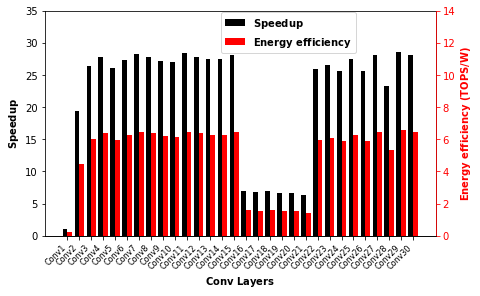

In [442]:
# c3d
# con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
# energy_efficiency = np.array([0.275, 5.9, 5.3, 5.1, 4.8, 4.9, 1.38, 1.154])
# power = np.array([0.2213, 0.2212 ,0.2210 ,0.2209 ,0.2208 ,0.2208 ,0.2210 ,0.2208 ])
# bar_width = 0.4
# y2_yticks_max = 12
# legend_loc = (0.65, 0.8)
# fig_name = '../../generate/speedup&EE_layer_of_C3D.svg'

# 3dunet
con_layer = [
'Conv1',
'Conv2',
'Conv3',
'Conv4',
'Conv5',
'Conv6',
'Conv7',
'Conv8',
'Conv9',
'Conv10',
'Conv11',
'Conv12',
'Conv13',
'Conv14',
'Conv15',
'Conv16',
'Conv17',
'Conv18',
'Conv19',
'Conv20',
'Conv21',
'Conv22',
'Conv23',
'Conv24',
'Conv25',
'Conv26',
'Conv27',
'Conv28',
'Conv29',
'Conv30'

]
energy_efficiency = np.array([
0.233286122,
4.435876361,
6.03772006,
6.371646318,
5.980497309,
6.240827834,
6.450648274,
6.371646318,
6.202671446,
6.166550284,
6.480048242,
6.371646318,
6.281370301,
6.281370301,
6.422937532,
1.57566893,
1.546093755,
1.592911579,
1.524844811,
1.516984233,
1.440326527,
5.926945078,
6.067936931,
5.876495005,
6.281370301,
5.876495005,
6.422937532,
5.337780384,
6.545353822,
6.422937532

])
power = np.array([
0.2231, 
0.2208, 
0.2213, 
0.2215, 
0.2213, 
0.2214, 
0.2215, 
0.2215, 
0.2214, 
0.2214, 
0.2216, 
0.2215, 
0.2214, 
0.2214, 
0.2215, 
0.2215, 
0.2214, 
0.2215, 
0.2213, 
0.2213, 
0.2212, 
0.2212, 
0.2213, 
0.2212, 
0.2214, 
0.2212, 
0.2215, 
0.2210, 
0.2216, 
0.2215 

 ])
bar_width = 0.4
xticks_fontsize = 8
y2_yticks_max = 14
legend_loc = (0.45, 0.81)
fig_name = '../../generate/speedup&EE_layer_of_3DUent.svg'


speedup = energy_efficiency*power/(0.175*0.2895)
# for x in range(len(technique)):
#     plt.text(x-0.15,energy_efficiency[x]+0.5,'%s' %round(energy_efficiency[x],2),va='center')
sys.path.append("../")
# import plt_fig
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": np.arange(len(con_layer)), 
            "x_label" : r"$\bf{Conv}$"+' ' +r"$\bf{Layers}$",
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":speedup, 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Speedup}$",
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":energy_efficiency,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$",
            "y2_yticks_max": y2_yticks_max,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": bar_width,
            "xticks": con_layer,
            'xticks_fontsize': xticks_fontsize,
            # "plt_text": False,
            "legend_loc": legend_loc,
            "fig_name" :fig_name
})

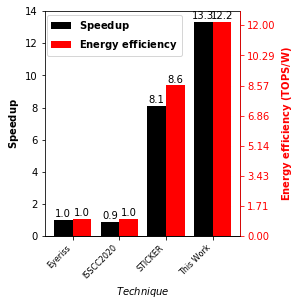

In [469]:
# #####################################################################
# # Comparison with Technique
# technique = ['Baseline', '+ FFZS', '+ HLB', '+ TDVD']
# # c3d
# # speedup = np.array([0.22, 1 ,3.2, 4.61])/0.22
# # energy_efficiency = np.array([0.175, 1 ,3.2, 4.21])
# # fig_name ='../../generate/technique_c3d.svg'

# # 3dunet
# speedup = np.array([0.22, 1 ,3.2, 5.8])/0.22
# energy_efficiency = np.array([0.175, 1 ,3.2, 5.8])
# fig_name ='../../generate/technique_3dunet.svg'


# #####################################################################
# # Comparsion with SOTA
technique = ['Eyeriss', 'ISSCC2020', 'STICKER', 'This Work']

speedup = np.array([1, 0.9, 8.1, 13.3])
energy_efficiency = np.array([1,  1, 8.6, 12.2])
fig_name ='../../generate/SOTA_3dunet.svg'

x_value = np.arange(len(technique))
x_label = "${Technique}$"
figsize = (3.5, 4.6)

bar_width = 0.4
xticks = technique
y2_yticks_max = 12
# #####################################################################
# # Sparsity-driven EE & Speedup
# sparsity = np.array([0, 33, 40, 60, 74, 85, 97])
# energy_efficiency = np.array([0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832])
# speedup = np.array([0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]) / 0.175
# fig_name = '../../generate/sparsity_driven_EE&speedup.svg'
# x_value = sparsity
# x_label = "${Inslice}$"# + ' ' + "$\bf{Sparsity}$"
# figsize = (7, 4.6)
# xticks = ['0', '33', '40', '60', '74', '85', '97']
# y2_yticks_max = 7
# bar_width = 4

xticks_fontsize = 8
legend_loc = (0.01, 0.8)

cls_plt_fig('').func_plt_fig({   "x_name":"Technique", 
            "x_value": x_value, 
            "x_label" : x_label,
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":speedup, 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Speedup}$",
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":energy_efficiency,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$",
            "y2_yticks_max": y2_yticks_max,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": bar_width,
            "xticks": xticks,
            'xticks_fontsize': xticks_fontsize,
            "figsize":figsize,
            "plt_text": False,
            "legend_loc": legend_loc,
            "fig_name" :fig_name
})

In [444]:
sparsity = [0, 33, 40, 60, 74, 85, 97]
energy = [0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]
speedup = [0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832] / 0.175
fig_name = '../../generate/sparsity_driven_EE&speedup.svg'



# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.230]
#plt.figure(figsize=(4,4))
color = (255/255, 0, 0)
# plt.figure(figsize =(3.4,2.5), dpi = 200 )
plt.plot(sparsity, energy, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

from numpy import polyfit, poly1d
coeff = polyfit(sparsity, energy, 4)
print(coeff)
f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'k-')
print(f(82))
# plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('In-slice Sparsity (%)', size=12)
plt.ylabel('Energy Efficiency (TOPS/W)', size=12)
plt.grid(True)

plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'float'